In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy.stats as st
import RELACS as rel
sns.set_style("darkgrid")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [91]:
npc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_normal_NPC48h_EPZvsDMSO.tsv", sep="\t")
npc_down = npc.loc[(npc.padj<0.1)&(npc.log2FoldChange<0)].index
npc_up = npc.loc[(npc.padj<0.1)&(npc.log2FoldChange>0)].index

In [92]:
gtf = "/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf"

In [93]:
k=0
dixio_ann = {}
classes = {}
with open(gtf) as g:
    for line in g:
        if not line.startswith("#"):
            

            lista=line.strip().split("\t")

            if lista[2] == 'gene':
                k+=1
                lista = lista[-1].split(";")
                geneID = lista[0].split()[1].split('"')[1]
                biotype = lista[1].split()[1].split('"')[1]
                
                if not biotype in classes:
                    classes[biotype] = 1
                else:
                     classes[biotype] += 1
                
                if not geneID in dixio_ann:
                    dixio_ann[geneID] = biotype
                else:
                    print("found double id")
for p in classes:
    classes[p] = classes[p]/k


In [94]:
deg_up = dict([(k,0) for k in list(classes.keys())])
deg_down = dict([(k,0) for k in list(classes.keys())])

for i in npc_down:
    deg_down[dixio_ann[i]] +=1
    
for i in npc_up:
    deg_up[dixio_ann[i]] +=1

for i in deg_up:
    deg_up[i] = deg_up[i] / len(npc_up)
for i in deg_down:
    deg_down[i] = deg_down[i] / len(npc_down)

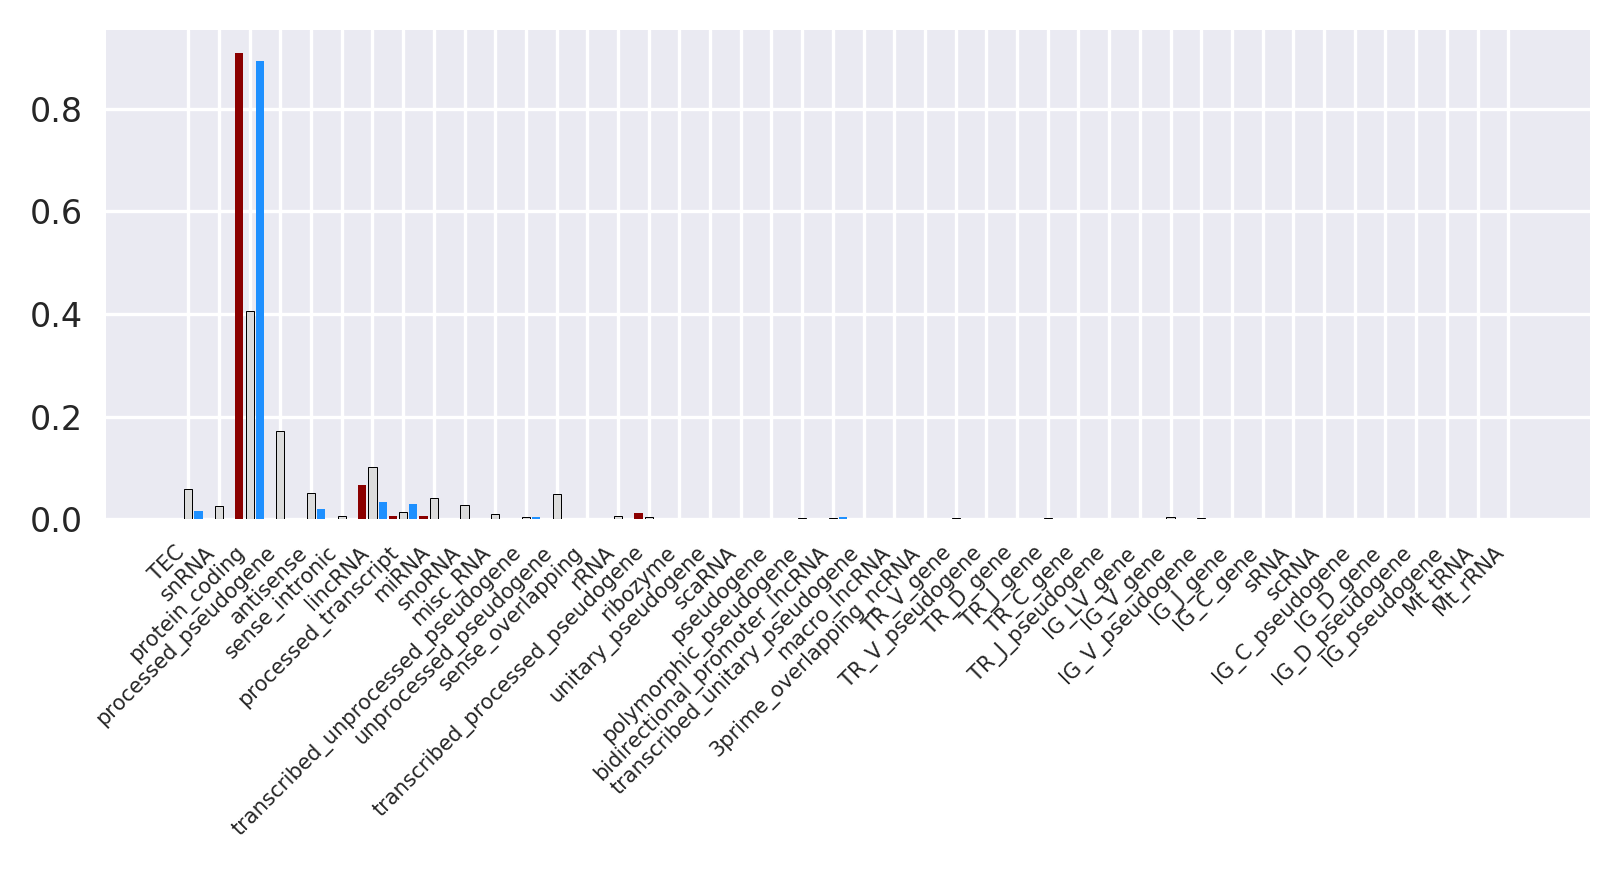

In [96]:
fig, ax = plt.subplots(dpi=300,figsize=(5.5,3))
kk = list(classes.keys())
ax.bar(range(len(kk)*3)[1::3],[classes[i] for i in kk], color="gainsboro", edgecolor='k')
ax.bar(range(len(kk)*3)[::3],[deg_up[i] for i in kk], color='darkred')
ax.bar(range(len(kk)*3)[2::3],[deg_down[i] for i in kk], color='dodgerblue')
ax.set_xticks(range(len(kk)*3)[1::3])
ax.set_xticklabels(kk, rotation=45, size=5, ha='right')
plt.tight_layout()
plt.savefig("../FIGURES/gene_biotype_NPC48h.png")

In [97]:
esc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_normal_mESC_EPZvsDMSO.tsv", sep="\t")
esc_down = esc.loc[(esc.padj<0.1)&(esc.log2FoldChange<0)].index
esc_up = esc.loc[(esc.padj<0.1)&(esc.log2FoldChange>0)].index

In [98]:
deg_up = dict([(k,0) for k in list(classes.keys())])
deg_down = dict([(k,0) for k in list(classes.keys())])

for i in esc_down:
    deg_down[dixio_ann[i]] +=1
    
for i in esc_up:
    deg_up[dixio_ann[i]] +=1

for i in deg_up:
    deg_up[i] = deg_up[i] / len(esc_up)
for i in deg_down:
    deg_down[i] = deg_down[i] / len(esc_down)

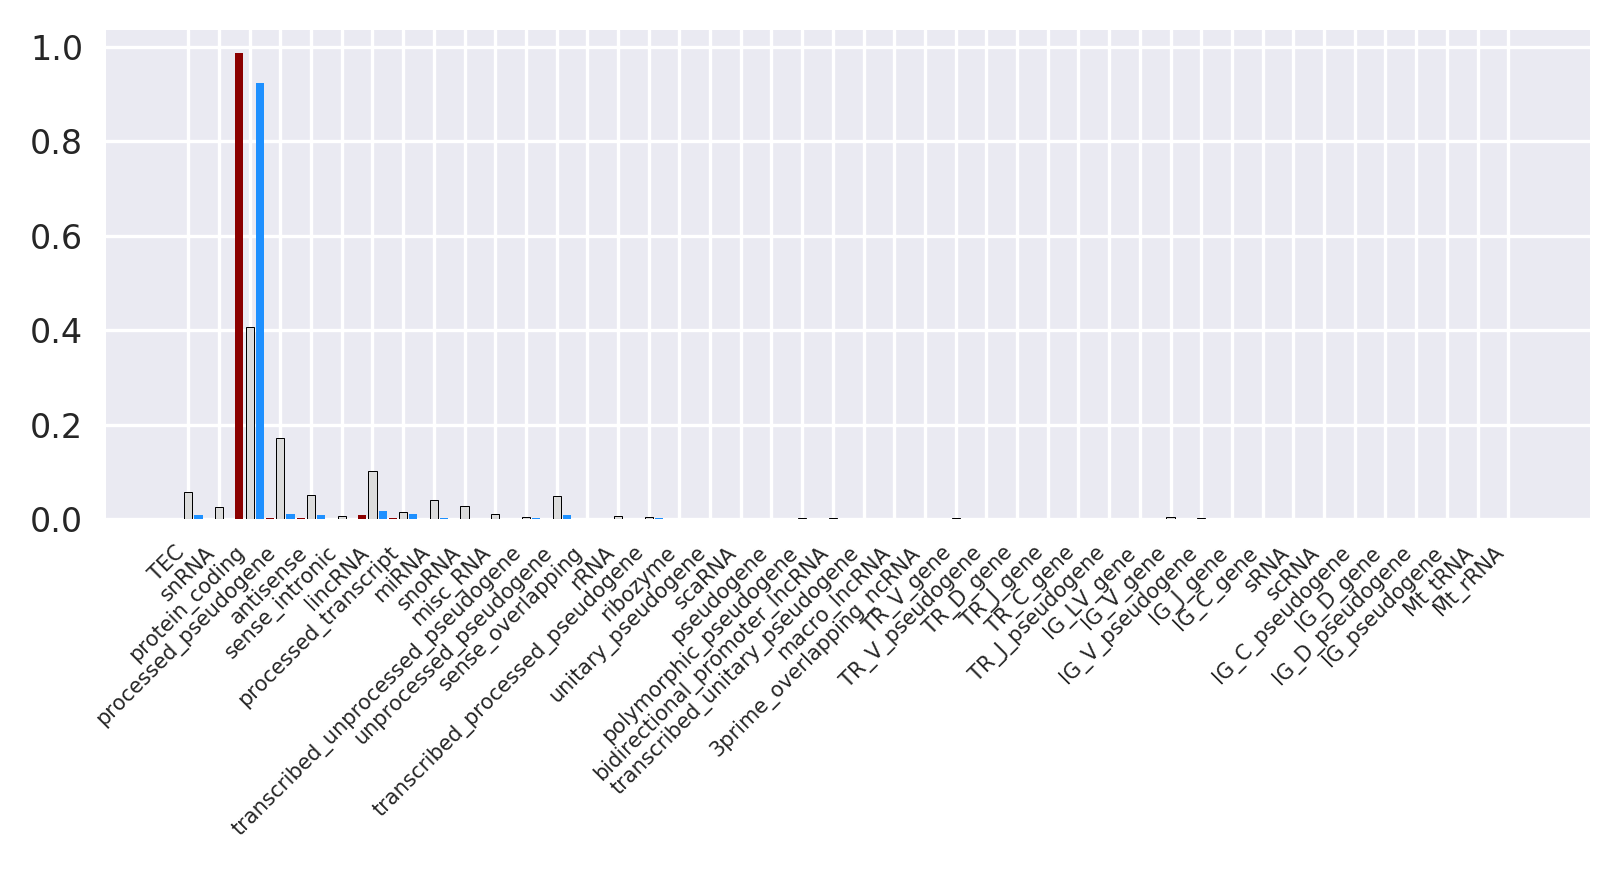

In [99]:
fig, ax = plt.subplots(dpi=300,figsize=(5.5,3))
kk = list(classes.keys())
ax.bar(range(len(kk)*3)[1::3],[classes[i] for i in kk], color="gainsboro", edgecolor='k')
ax.bar(range(len(kk)*3)[::3],[deg_up[i] for i in kk], color='darkred')
ax.bar(range(len(kk)*3)[2::3],[deg_down[i] for i in kk], color='dodgerblue')
ax.set_xticks(range(len(kk)*3)[1::3])
ax.set_xticklabels(kk, rotation=45, size=5, ha='right')
plt.tight_layout()
plt.savefig("../FIGURES/gene_biotype_mESC.png")